# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
# dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())

current working dirE:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import logging
logging.basicConfig(level=logging.INFO)

from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")

from extractors.loader import Loader

In [5]:
loader = Loader(dataDir, 'inD')

In [25]:
recordingData = loader.getRecordingData('21') 
recordingData.backgroundImagePath

INFO:root:Downsampling recording 21 from 25.0 to 2.5
downsampling: 100%|█████████████████████████████████████████████████████████| 796178/796178 [00:50<00:00, 15731.18it/s]


'G:AV datasets/inD-dataset-v1.0/data/21_background.png'

In [26]:
recordingData.tracksMetaDf.head()

,recordingId,trackId,initialFrame,finalFrame,numFrames,width,length,class
0,21,0,0,312,313,1.90258,4.44230,car
1,21,1,0,592,593,0.00000,0.00000,pedestrian
2,21,2,0,325,326,1.91796,5.04827,car
3,21,3,0,1053,1054,0.00000,0.00000,pedestrian
4,21,4,0,196,197,0.00000,0.00000,pedestrian


In [27]:
recordingData.tracksMetaDf["class"].unique()

array(['car', 'pedestrian', 'bicycle', 'truck_bus'], dtype=object)

In [10]:
# recordingData.getCarIds()

In [11]:
# recordingData.getLargeVehicleIds()

In [12]:
# recordingData.getBicycleIds()

In [13]:
# recordingData.getPedIds()

In [14]:
# recordingData.getVehicleIds()

In [15]:
# frameDf = recordingData.getDfByFrameSpan(0, 0)

In [16]:
# len(frameDf)

In [17]:
# recordingData.getDfById(41)

In [28]:

from tools.UnitUtils import UnitUtils
allLocationSceneConfig = UnitUtils.loadSceneConfiguration()
sceneConfigs = allLocationSceneConfig['2']
sceneId = 11
sC = sceneConfigs[str(sceneId)]
print(sC)
sceneData = recordingData.getSceneData(sceneId, sC, refresh=True)
print(sceneData)

{'centerXPixel': 688.5, 'centerYPixel': 273.5, 'centerX': 67.3, 'centerY': -26.74, 'angle': 12.17, 'roadWidth': 5.0, 'boxWidth': 5.0}


recording-21-scene11-truck_bus-Ids: 100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.83it/s]
clipping ped trajectories for scene # 11 with width offset 4.0: 100%|████████████████████| 1/1 [00:00<00:00, 71.44it/s]
clipping other trajectories for scene # 11: 100%|██████████████████████████████████████| 92/92 [00:01<00:00, 91.27it/s]
INFO:root:adding pedestrian local dynamics for scene 11
deriving velocity on sceneY at fps 2.5: 100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 334.31it/s]
deriving acceleration on sceneXVelocity at fps 2.5: 100%|███████████████████████████████| 1/1 [00:00<00:00, 334.21it/s]
deriving acceleration on sceneYVelocity at fps 2.5: 100%|███████████████████████████████| 1/1 [00:00<00:00, 333.33it/s]
INFO:root:adding other local dynamics for scene 11
deriving velocity on sceneY at fps 2.5: 100%|█████████████████████████████████████████| 92/92 [00:00<00:00, 374.00it/s]
deriving acceleration on sceneXVelocity at fps 2.5: 1

In [30]:
pedDf = sceneData.getPedDataInSceneCoordinates()
pedDf.head()

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,...,yAcceleration,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
2,21,102,4469,400,64.75327,-24.26111,315.79286,0.0,0.0,0.66159,...,0.01490,21102,11,5.0,-1.966914,2.960064,-0.443991,1.086210,-0.042048,-0.051480
3,21,102,4479,410,65.01907,-24.64656,315.94453,0.0,0.0,0.66964,...,0.08251,21102,11,5.0,-1.788345,2.527243,-0.446422,1.082054,0.006077,0.010390
4,21,102,4489,420,65.29059,-25.01890,316.42154,0.0,0.0,0.69002,...,0.13781,21102,11,5.0,-1.601421,2.106030,-0.467310,1.053030,0.052220,0.072560
5,21,102,4499,430,65.57252,-25.36869,317.27099,0.0,0.0,0.72153,...,0.16901,21102,11,5.0,-1.399567,1.704667,-0.504634,1.003409,0.093312,0.124054
6,21,102,4509,440,65.86906,-25.69027,318.53994,0.0,0.0,0.76275,...,0.16434,21102,11,5.0,-1.177485,1.327800,-0.555206,0.942169,0.126429,0.153100


In [16]:
otherDf = sceneData.getOtherDataInSceneCoordinates()
otherDf.head()

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,...,uniqueTrackId,sceneId,roadWidth,class,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
2,19,16,302,70,38.27716,-32.99946,10.65386,2.06353,5.15411,6.91869,...,19016,10,5.0,car,-23.694131,0.005699,-7.067459,0.267166,-0.437622,-0.330739
3,19,16,312,80,41.06384,-32.51196,10.82879,2.06353,5.15411,7.07186,...,19016,10,5.0,car,-20.867306,-0.105226,-7.067062,0.277311,-0.000994,-0.025360
4,19,16,322,90,43.96534,-31.99766,10.98268,2.06353,5.15411,7.52231,...,19016,10,5.0,car,-17.922592,-0.214158,-7.361785,0.272330,0.736809,0.012451
5,19,16,332,100,47.10503,-31.43942,10.76852,2.06353,5.15411,8.17264,...,19016,10,5.0,car,-14.735778,-0.330351,-7.967035,0.290483,1.513126,-0.045381
6,19,16,342,110,50.52537,-30.82353,10.62953,2.06353,5.15411,8.93215,...,19016,10,5.0,car,-11.262468,-0.449354,-8.683276,0.297508,1.790601,-0.017564


In [10]:

# other = otherDf[otherDf["uniqueTrackId"]==19108]
# other

In [11]:
# otherFull = sceneData.otherData[sceneData.otherData["uniqueTrackId"] == 19108]
# otherFull

In [31]:
pedScene = pedDf[pedDf["uniqueTrackId"]==21102]
pedScene

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,...,yAcceleration,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
2,21,102,4469,400,64.75327,-24.26111,315.79286,0.0,0.0,0.66159,...,0.01490,21102,11,5.0,-1.966914,2.960064,-0.443991,1.086210,-0.042048,-0.051480
3,21,102,4479,410,65.01907,-24.64656,315.94453,0.0,0.0,0.66964,...,0.08251,21102,11,5.0,-1.788345,2.527243,-0.446422,1.082054,0.006077,0.010390
4,21,102,4489,420,65.29059,-25.01890,316.42154,0.0,0.0,0.69002,...,0.13781,21102,11,5.0,-1.601421,2.106030,-0.467310,1.053030,0.052220,0.072560
5,21,102,4499,430,65.57252,-25.36869,317.27099,0.0,0.0,0.72153,...,0.16901,21102,11,5.0,-1.399567,1.704667,-0.504634,1.003409,0.093312,0.124054
6,21,102,4509,440,65.86906,-25.69027,318.53994,0.0,0.0,0.76275,...,0.16434,21102,11,5.0,-1.177485,1.327800,-0.555206,0.942169,0.126429,0.153100
7,21,102,4519,450,66.18311,-25.98033,320.29813,0.0,0.0,0.81643,...,0.11713,21102,11,5.0,-0.931641,0.978052,-0.614609,0.874368,0.148508,0.169502
8,21,102,4529,460,66.52104,-26.25790,322.55486,0.0,0.0,0.85028,...,0.10026,21102,11,5.0,-0.659821,0.635480,-0.679550,0.856430,0.162352,0.044844
9,21,102,4539,470,66.86536,-26.51691,325.25426,0.0,0.0,0.88915,...,0.08626,21102,11,5.0,-0.377842,0.309704,-0.704948,0.814441,0.063494,0.104974
10,21,102,4549,480,67.23528,-26.75772,328.32230,0.0,0.0,0.97253,...,0.06637,21102,11,5.0,-0.067001,-0.003678,-0.777102,0.783455,0.180384,0.077464
11,21,102,4559,490,67.63954,-26.99669,331.67057,0.0,0.0,1.03810,...,0.11644,21102,11,5.0,0.277796,-0.322501,-0.861992,0.797057,0.212226,-0.034004


In [18]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

In [45]:
localMeta = sceneData.getMeta()

In [52]:
localMeta.sort_values(by=['numFrames'])

,uniqueTrackId,initialFrame,finalFrame,numFrames,class,horizontalDirection,verticalDirection
8,19063,3335,3345,3,pedestrian,EAST,SOUTH
3,19049,2604,2614,4,pedestrian,EAST,SOUTH
116,19246,17290,17300,7,bicycle,EAST,SOUTH
15,19149,9823,9833,8,pedestrian,WEST,NORTH
0,19040,1999,2009,8,pedestrian,WEST,NORTH
...,...,...,...,...,...,...,...
47,19078,4638,4648,61,car,EAST,SOUTH
105,19069,3777,3787,68,bicycle,EAST,NORTH
90,19300,21106,21116,72,car,EAST,SOUTH
119,19262,18570,18580,90,bicycle,EAST,NORTH


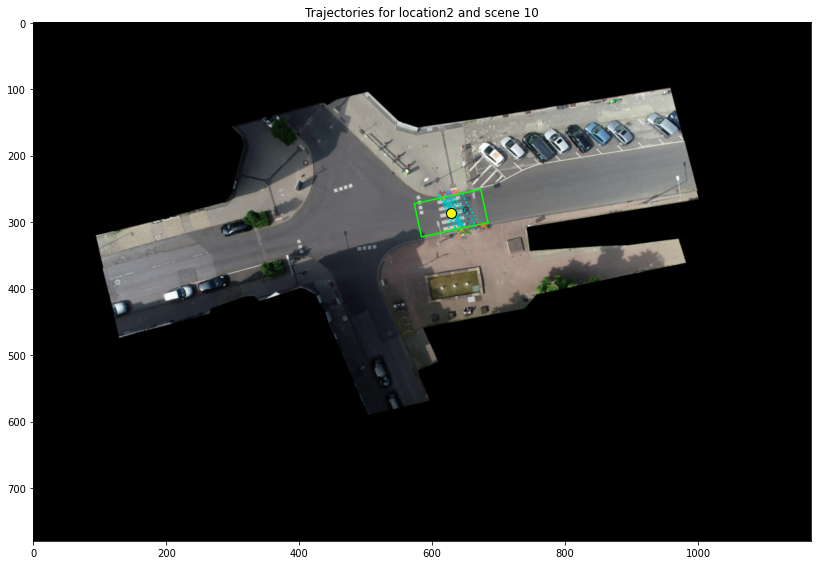

In [42]:
visualizer.showLocationSceneData(sceneData, onlyClipped=True)

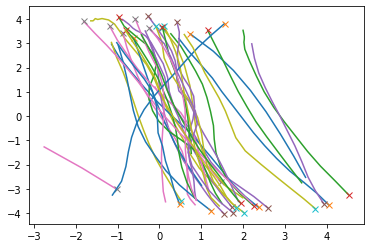

In [44]:
pedDf = sceneData.getPedDataInSceneCoordinates()
visualizer.showLocalTrajectories(pedDf, "uniqueTrackId", "sceneX", "sceneY")